In [2]:
#IMPORT ALL THE REQUIRED LIBERARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Optional: for warnings suppression
import warnings
warnings.filterwarnings('ignore')

# Set visualizations inline
%matplotlib inline

In [3]:
# Load the dataset (--)
procedureevents_mv = pd.read_csv('PROCEDUREEVENTS_MV.csv.gz')

# Preview the dataset
procedureevents_mv.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,VALUE,VALUEUOM,LOCATION,...,ORDERCATEGORYNAME,SECONDARYORDERCATEGORYNAME,ORDERCATEGORYDESCRIPTION,ISOPENBAG,CONTINUEINNEXTDEPT,CANCELREASON,STATUSDESCRIPTION,COMMENTS_EDITEDBY,COMMENTS_CANCELEDBY,COMMENTS_DATE
0,379,29070,115071,232563.0,2145-03-12 23:04:00,2145-03-12 23:05:00,225401,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
1,380,29070,115071,232563.0,2145-03-12 23:04:00,2145-03-12 23:05:00,225454,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
2,381,29070,115071,232563.0,2145-03-12 23:05:00,2145-03-18 20:01:00,225792,8456.0,hour,NaN,...,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
3,382,29070,115071,232563.0,2145-03-12 23:36:00,2145-03-12 23:37:00,225402,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
4,383,29070,115071,232563.0,2145-03-13 01:27:00,2145-03-16 16:00:00,224560,5193.0,min,Right IJ,...,Invasive Lines,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN


In [4]:
# Check data types and non-null counts
procedureevents_mv.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258066 entries, 0 to 258065
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ROW_ID                      258066 non-null  int64  
 1   SUBJECT_ID                  258066 non-null  int64  
 2   HADM_ID                     258066 non-null  int64  
 3   ICUSTAY_ID                  257978 non-null  float64
 4   STARTTIME                   258066 non-null  object 
 5   ENDTIME                     258066 non-null  object 
 6   ITEMID                      258066 non-null  int64  
 7   VALUE                       258066 non-null  float64
 8   VALUEUOM                    258066 non-null  object 
 9   LOCATION                    52612 non-null   object 
 10  LOCATIONCATEGORY            52612 non-null   object 
 11  STORETIME                   258066 non-null  object 
 12  CGID                        258066 non-null  int64  
 13  ORDERID       

In [5]:
# Identify missing values
missing = procedureevents_mv.isnull().sum()
print(missing[missing > 0])

# Drop duplicate rows if any
duplicates = procedureevents_mv.duplicated().sum()
print(f'Total duplicate rows: {duplicates}')
procedureevents_mv.drop_duplicates(inplace=True)

ICUSTAY_ID                        88
LOCATION                      205454
LOCATIONCATEGORY              205454
SECONDARYORDERCATEGORYNAME    258066
COMMENTS_EDITEDBY             255973
COMMENTS_CANCELEDBY           252377
COMMENTS_DATE                 250284
dtype: int64
Total duplicate rows: 0


In [6]:
# Convert STARTTIME and ENDTIME to datetime objects
procedureevents_mv['STARTTIME'] = pd.to_datetime(procedureevents_mv['STARTTIME'])
procedureevents_mv['ENDTIME'] = pd.to_datetime(procedureevents_mv['ENDTIME'])
procedureevents_mv.dtypes


ROW_ID                                 int64
SUBJECT_ID                             int64
HADM_ID                                int64
ICUSTAY_ID                           float64
STARTTIME                     datetime64[ns]
ENDTIME                       datetime64[ns]
ITEMID                                 int64
VALUE                                float64
VALUEUOM                              object
LOCATION                              object
LOCATIONCATEGORY                      object
STORETIME                             object
CGID                                   int64
ORDERID                                int64
LINKORDERID                            int64
ORDERCATEGORYNAME                     object
SECONDARYORDERCATEGORYNAME           float64
ORDERCATEGORYDESCRIPTION              object
ISOPENBAG                              int64
CONTINUEINNEXTDEPT                     int64
CANCELREASON                           int64
STATUSDESCRIPTION                     object
COMMENTS_E

In [7]:
# Encode selected categorical columns
categorical_cols = ['ORDERCATEGORYNAME', 'ORDERCATEGORYDESCRIPTION', 'STATUSDESCRIPTION']
for col in categorical_cols:
    procedureevents_mv[col + '_ENC'] = procedureevents_mv[col].astype('category').cat.codes

# Display unique values for verification
procedureevents_mv[[col for col in categorical_cols]].drop_duplicates().head()


,ORDERCATEGORYNAME,ORDERCATEGORYDESCRIPTION,STATUSDESCRIPTION
0,Procedures,Electrolytes,FinishedRunning
2,Ventilation,Task,FinishedRunning
4,Invasive Lines,Task,FinishedRunning
5,Procedures,Electrolytes,Rewritten
9,Imaging,Electrolytes,FinishedRunning


In [8]:
from sklearn.preprocessing import MinMaxScaler

# Normalize ROW_ID
scaler = MinMaxScaler()
procedureevents_mv['ROW_ID_scaled'] = scaler.fit_transform(procedureevents_mv[['ROW_ID']])
procedureevents_mv[['ROW_ID', 'ROW_ID_scaled']].head()


,ROW_ID,ROW_ID_scaled
0,379,0.001465
1,380,0.001469
2,381,0.001472
3,382,0.001476
4,383,0.001480


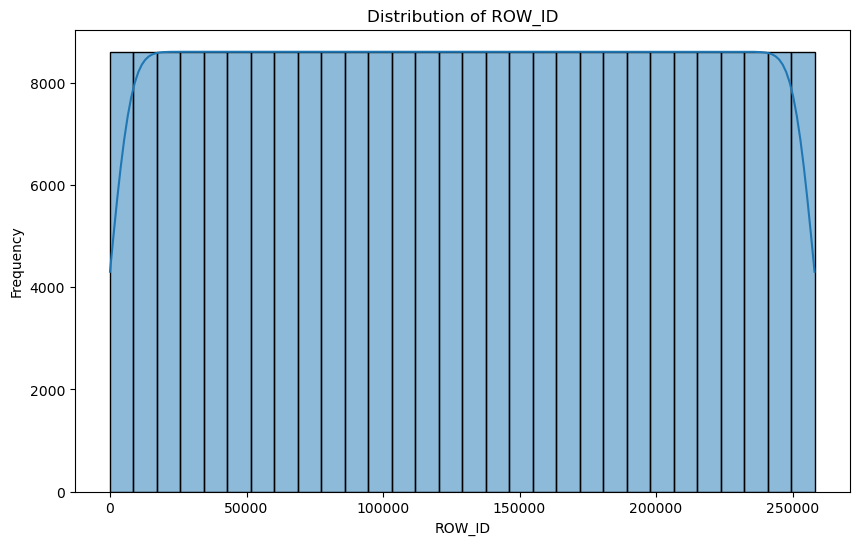

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(procedureevents_mv['ROW_ID'], kde=True, bins=30)
plt.title('Distribution of ROW_ID')
plt.xlabel('ROW_ID')
plt.ylabel('Frequency')
plt.show()


In [10]:
procedureevents_mv.to_csv('procedureevents_mv_cleaned.csv', index=False)


In [11]:
!pip install sdv


In [12]:
import os
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

# Set environment variables for multiprocessing
os.environ["NUMBA_NUM_THREADS"] = "1"
os.environ["JOBLIB_START_METHOD"] = "spawn"

# Load the cleaned dataset
procedureevents_mv_cleaned = pd.read_csv('procedureevents_mv_cleaned.csv')


In [ ]:
# Generate metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(procedureevents_mv_cleaned)

# Initialize and fit the synthesizer
synthesizer = CTGANSynthesizer(metadata=metadata, epochs=300)
synthesizer.fit(procedureevents_mv_cleaned)


In [ ]:
# Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=1000)
synthetic_data.to_csv("synthetic_procedureevents_mv.csv", index=False)
synthetic_data.head()


In [ ]:
# Compare distributions of a categorical column
column = 'ORDERCATEGORYNAME_ENC'

plt.figure(figsize=(10,5))
sns.histplot(procedureevents_mv_cleaned[column], color='blue', label='Real', alpha=0.5, kde=True)
sns.histplot(synthetic_data[column], color='red', label='Synthetic', alpha=0.5, kde=True)

plt.legend()
plt.title(f"Real vs Synthetic: {column}")
plt.show()


In [ ]:
# Create a binary target based on VALUE
procedureevents_mv_cleaned['TARGET'] = (procedureevents_mv_cleaned['VALUE'] > 1000).astype(int)
synthetic_data['TARGET'] = (synthetic_data['VALUE'] > 1000).astype(int)

features = ['ORDERCATEGORYNAME_ENC', 'STATUSDESCRIPTION_ENC']
target = 'TARGET'

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Real data model
X_real = procedureevents_mv_cleaned[features]
y_real = procedureevents_mv_cleaned[target]
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_real, y_real, test_size=0.3)

model_real = RandomForestClassifier()
model_real.fit(Xr_train, yr_train)
real_acc = accuracy_score(yr_test, model_real.predict(Xr_test))

# Synthetic data model
X_syn = synthetic_data[features]
y_syn = synthetic_data[target]
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_syn, y_syn, test_size=0.3)

model_syn = RandomForestClassifier()
model_syn.fit(Xs_train, ys_train)
syn_acc = accuracy_score(ys_test, model_syn.predict(Xs_test))

print(f"Model accuracy on real data:     {real_acc:.2f}")
print(f"Model accuracy on synthetic data:{syn_acc:.2f}")


In [ ]:
import matplotlib.pyplot as plt

#  accuracy values
# These are from your previous results:
real_acc = real_acc          # Accuracy on real data using real training
vae_acc = vae_acc           # Accuracy on synthetic VAE data
gan_acc = syn_acc           # Accuracy on synthetic GAN (CTGAN) data

# Prepare bar chart data
labels = ['Real Data (Original)', 'CTGAN (Synthetic)', 'TVAE (Synthetic)']
accuracy_scores = [real_acc, gan_acc, vae_acc]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracy_scores, color=['skyblue', 'orange', 'green'])

#  chart elements
plt.title('Model Accuracy Comparison: Real vs CTGAN vs TVAE', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy Score')
plt.ylim(0.2, 1.5)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Annotate bars
for i, acc in enumerate(accuracy_scores):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()